In [26]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Session 3 - Geovisualization using Python Libraries <img src="./Resources/sla.png" width="100" align ="right"/>

This session introduces techniques for effectively loading, manipulating, and visualizing geospatial data in Python. These techniques are fundamental to the process of doing geospatial data science. We will come back to QGIS at Session 5. Now, let's deal with geospatial data using open source Python libraries (i.e., NumPy, Pandas, GeoPands, Matplotlib, etc.).

## NumPy

NumPy (Numerical Python) is a C implementation of arrays in Python. It provides an efficient interface to store and operate on dense data buffers. NumPy arrays provide much more efficient storage and data operations than Python list as the arrays grow larger in size. 

In [3]:
import numpy as np

In [4]:
np?

Type:        module
String form: <module 'numpy' from 'C:\\OSGEO4~1\\apps\\Python37\\lib\\site-packages\\numpy\\__init__.py'>
File:        c:\osgeo4~1\apps\python37\lib\site-packages\numpy\__init__.py
Docstring:  
NumPy
=====

Provides
  1. An array object of arbitrary homogeneous items
  2. Fast mathematical operations over arrays
  3. Linear Algebra, Fourier Transforms, Random Number Generation

How to use the documentation
----------------------------
Documentation is available in two forms: docstrings provided
with the code, and a loose standing reference guide, available from
`the NumPy homepage <https://www.scipy.org>`_.

We recommend exploring the docstrings using
`IPython <https://ipython.org>`_, an advanced Python shell with
TAB-completion and introspection capabilities.  See below for further
instructions.

The docstring examples assume that `numpy` has been imported as `np`::

  >>> import numpy as np

Code snippets are indicated by three greater-than signs::

  >>> x = 42
 

In [6]:
dir(np)

['ALLOW_THREADS',
 'AxisError',
 'BUFSIZE',
 'CLIP',
 'ComplexWarning',
 'DataSource',
 'ERR_CALL',
 'ERR_DEFAULT',
 'ERR_IGNORE',
 'ERR_LOG',
 'ERR_PRINT',
 'ERR_RAISE',
 'ERR_WARN',
 'FLOATING_POINT_SUPPORT',
 'FPE_DIVIDEBYZERO',
 'FPE_INVALID',
 'FPE_OVERFLOW',
 'FPE_UNDERFLOW',
 'False_',
 'Inf',
 'Infinity',
 'MAXDIMS',
 'MAY_SHARE_BOUNDS',
 'MAY_SHARE_EXACT',
 'MachAr',
 'ModuleDeprecationWarning',
 'NAN',
 'NINF',
 'NZERO',
 'NaN',
 'PINF',
 'PZERO',
 'RAISE',
 'RankWarning',
 'SHIFT_DIVIDEBYZERO',
 'SHIFT_INVALID',
 'SHIFT_OVERFLOW',
 'SHIFT_UNDERFLOW',
 'ScalarType',
 'Tester',
 'TooHardError',
 'True_',
 'UFUNC_BUFSIZE_DEFAULT',
 'UFUNC_PYVALS_NAME',
 'VisibleDeprecationWarning',
 'WRAP',
 '_NoValue',
 '_UFUNC_API',
 '__NUMPY_SETUP__',
 '__all__',
 '__builtins__',
 '__cached__',
 '__config__',
 '__dir__',
 '__doc__',
 '__file__',
 '__getattr__',
 '__git_revision__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_add_newdoc_ufunc',
 '_

### Understand Python Data Types 

The CPython implementation is written in C. When we define an integer in Python, such as x = 100, x is actually a pointer to a compound C structure, which contains several values. 
A single integer in Python contains four pieces:

- ``ob_refcnt``, a reference count that helps Python silently handle memory allocation and deallocation
- ``ob_type``, which encodes the type of the variable
- ``ob_size``, which specifies the size of the following data members
- ``ob_digit``, which contains the actual integer value that we expect the Python variable to represent.

There is some overhead in storing an integer in Python as compared to C, as illustrated in the following figure:

![Integer Memory Layout](Resources/Figures/cint_vs_pyint.png)

An integer in C is a label for a position in memory whose bytes encode an integer value. A Python integer is a pointer to a position in memory containing all the Python object information, including the bytes (ob_digit) that contain the integer value. Everything in Python is an object. This structure allows Python to be coded so freely and dynamically. Let's look at Python list. Python's list can contain different data types (heterogeneous lists) due to dynamic typing.

In [10]:
L3 = [True, "2", 3.0, 4]
[type(item) for item in L3]

[bool, str, float, int]

The cost of this flexibility is that each item in the list must contain its own type info, even if all items are the same type. In this case, much of the information is redundant, and it can be much more efficient to store data in a fixed-type array (NumPy-style).

![Integer Memory Layout](Resources/Figures/array_vs_list.png)

### Understand Basic Numpy Vectorization 

Although Python's array object provides array-based data as well, the ndarray object of the NumPy package is much more useful, as NumPy adds efficient operations on that data using vectorization.

In [12]:
def foo(a, b):
    if a >= b:
       return a + b
    else:
       return a - b

In [32]:
a = np.array([10, 20, 90, 100])
b = 50
# the next line cause value error
# foo(a,b)

In [16]:
# Create a vectorized version of foo
vecfoo = np.vectorize(foo)
vecfoo(a,b)

array([-40, -30, 140, 150])

In [22]:
c=[10,20]
d=1
results=[]
for i in c:
    results.append(d+i)
results

[11, 21]

In [28]:
[i+b if i>b else i-b for i in a]

[-40, -30, 140, 150]

### Create Numpy Arrays from scratch

What is b is also an array? How to add a and b? This is related to the next topic of broadcasting. Let's first look at how to create arrays from scratch using methods built into NumPy.

In [33]:
a = np.array([10, 20, 90, 100])
b = np.array([50,60])
# a+b

In [34]:
# Create a length-10 integer array filled with zeros
np.zeros(10, dtype=int)

In [38]:
np.zeros(10, dtype='int16')

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int16)

| Data type	    | Description |
|---------------|-------------|
| ``bool_``     | Boolean (True or False) stored as a byte |
| ``int_``      | Default integer type (same as C ``long``; normally either ``int64`` or ``int32``)| 
| ``intc``      | Identical to C ``int`` (normally ``int32`` or ``int64``)| 
| ``intp``      | Integer used for indexing (same as C ``ssize_t``; normally either ``int32`` or ``int64``)| 
| ``int8``      | Byte (-128 to 127)| 
| ``int16``     | Integer (-32768 to 32767)|
| ``int32``     | Integer (-2147483648 to 2147483647)|
| ``int64``     | Integer (-9223372036854775808 to 9223372036854775807)| 
| ``uint8``     | Unsigned integer (0 to 255)| 
| ``uint16``    | Unsigned integer (0 to 65535)| 
| ``uint32``    | Unsigned integer (0 to 4294967295)| 
| ``uint64``    | Unsigned integer (0 to 18446744073709551615)| 
| ``float_``    | Shorthand for ``float64``.| 
| ``float16``   | Half precision float: sign bit, 5 bits exponent, 10 bits mantissa| 
| ``float32``   | Single precision float: sign bit, 8 bits exponent, 23 bits mantissa| 
| ``float64``   | Double precision float: sign bit, 11 bits exponent, 52 bits mantissa| 
| ``complex_``  | Shorthand for ``complex128``.| 
| ``complex64`` | Complex number, represented by two 32-bit floats| 
| ``complex128``| Complex number, represented by two 64-bit floats| 

In [34]:
# Create a 3x5 floating-point array filled with ones
np.ones((3, 5), dtype=float)

In [34]:
# Create a 3x5 array filled with 3.14
np.full((3, 5), 3.14)

array([[3.14, 3.14, 3.14, 3.14, 3.14],
       [3.14, 3.14, 3.14, 3.14, 3.14],
       [3.14, 3.14, 3.14, 3.14, 3.14]])

In [36]:
# Create a 3x3 identity matrix
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [37]:
# Create an uninitialized array of three integers
# The values will be whatever happens to already exist at that memory location
np.empty(3)

array([1., 1., 1.])

In [ ]:
# Create an array filled with a linear sequence
# Starting at 0, ending at 20, stepping by 2
# (this is similar to the built-in range() function)
np.arange(0, 20, 2)

In [ ]:
# Create an array of five values evenly spaced between 0 and 1
np.linspace(0, 1, 5)

In [40]:
# create an 2D array
a = np.array([[1,2],[3,4],[5,6]])
print(np.shape(a))
print(a.shape)
print(a.ndim)

(3, 2)
(3, 2)
2


### Create Random Numbers 

In [35]:
# Create a 3x3 array of uniformly distributed
# random values between 0 and 1
np.random.random((3, 3))

array([[0.40121118, 0.47760715, 0.78165763],
       [0.50812425, 0.33595897, 0.54053657],
       [0.02746623, 0.44913132, 0.57396857]])

In [41]:
# Create a 3x3 array of normally distributed random values
# with mean 0 and standard deviation 1
np.random.normal(0, 1, (3, 3))

array([[-0.32250767,  0.52947906,  0.93137695],
       [-0.76296453, -0.34475489, -0.28861167],
       [-0.80162761, -1.87238651, -0.43157154]])

In [47]:
# normal distribution
x = np.random.normal(loc=1, scale=2, size=(2, 3))
print(x)

[[-1.97949149  0.07088962 -0.55938813]
 [ 1.22186105  4.23425055 -0.62086966]]


In [42]:
# Create a 3x3 array of random integers in the interval [0, 10)
np.random.randint(0, 10, (3, 3))

array([[9, 5, 5],
       [9, 6, 4],
       [1, 0, 1]])

In [44]:
x = np.random.choice([3, 5, 7, 9])
print(x)

3


In [45]:
x = np.random.choice([3, 5, 7, 9], size=(3, 5))
print(x)

[[7 5 7 7 5]
 [9 5 7 7 9]
 [5 3 5 5 7]]


In [46]:
# data distribution
x = np.random.choice([3, 5, 7, 9], p=[0.1, 0.3, 0.6, 0.0], size=(100))
print(x)

[7 3 7 7 7 7 3 7 5 7 3 7 7 7 7 7 7 7 7 7 5 3 7 7 7 7 7 7 7 7 5 3 7 7 5 7 7
 7 3 5 3 3 7 7 3 5 7 3 3 7 7 7 7 7 7 7 7 7 3 7 3 5 5 7 7 7 7 7 7 5 7 7 7 7
 7 5 7 5 5 7 7 7 7 7 5 5 3 7 7 7 7 7 7 7 5 7 5 7 7 7]


In [48]:
# binomial distribution
x = np.random.binomial(n=10, p=0.5, size=10)
print(x)

[7 5 3 7 6 4 5 4 4 4]


In [49]:
x = np.random.poisson(lam=2, size=10)
print(x)

[0 2 1 3 1 3 3 1 2 2]


In [50]:
x = np.random.uniform(size=(2, 3))

In [51]:
x = np.random.logistic(loc=1, scale=2, size=(2, 3))

In [52]:
x = np.random.multinomial(n=6, pvals=[1/6, 1/6, 1/6, 1/6, 1/6, 1/6])

In [53]:
x = np.random.exponential(scale=2, size=(2, 3))

In [54]:
x = np.random.chisquare(df=2, size=(2, 3))

### Array Indexing 

In [68]:
x=np.random.normal(0, 10, (4, 4))
x

array([[ -6.4031933 ,  -8.80990286,  -8.52264142,   4.70639473],
       [-21.80222489, -13.17149572,   8.18129848,   5.48014523],
       [ -4.02745804,   8.09985177,   2.58034132,  -5.26890741],
       [ 22.20111718,  -4.708983  ,  20.58172123,  11.43269941]])

In [69]:
x[0,1]

-8.809902859676939

In [70]:
x[-1,1]

-4.708982998326853

### Array Slicing

Just as we can use square brackets to access individual Python array elements, we can also use them to access Numpy subarrays with the slice notation, marked by the colon (:) character.
```
x[start:stop:step]
```
If any of these are unspecified, they default to the values start=0, stop=size of dimension, step=1. We'll take a look at accessing sub-arrays in one dimension and in multiple dimensions.

In [74]:
x[:3]  # first three rows

array([[ -6.4031933 ,  -8.80990286,  -8.52264142,   4.70639473],
       [-21.80222489, -13.17149572,   8.18129848,   5.48014523],
       [ -4.02745804,   8.09985177,   2.58034132,  -5.26890741]])

In [76]:
x[:3,2:] # row 1 to 3, column 3 to 4 

array([[-8.52264142,  4.70639473],
       [ 8.18129848,  5.48014523],
       [ 2.58034132, -5.26890741]])

In [77]:
x[:-1,1]

array([ -8.80990286, -13.17149572,   8.09985177])

In [79]:
x[::-1] #reverse row

array([[ 22.20111718,  -4.708983  ,  20.58172123,  11.43269941],
       [ -4.02745804,   8.09985177,   2.58034132,  -5.26890741],
       [-21.80222489, -13.17149572,   8.18129848,   5.48014523],
       [ -6.4031933 ,  -8.80990286,  -8.52264142,   4.70639473]])

In [81]:
x[::2]

array([[-6.4031933 , -8.80990286, -8.52264142,  4.70639473],
       [-4.02745804,  8.09985177,  2.58034132, -5.26890741]])

In [80]:
x[::-2]

array([[ 22.20111718,  -4.708983  ,  20.58172123,  11.43269941],
       [-21.80222489, -13.17149572,   8.18129848,   5.48014523]])

In [88]:
x=np.array([9, 8, 7, 6, 5, 4, 3, 2, 1, 0])

In [91]:
x[3::2]

array([6, 4, 2, 0])

In [92]:
x[3::-2]

array([6, 8])

Note: if step is nagative, start should be larger than stop.

In [98]:
x[1:8:2]

array([8, 6, 4, 2])

In [99]:
x[8:1:-2]

array([1, 3, 5, 7])

### Accessing array rows and columns 

In [100]:
x=np.random.normal(0, 10, (4, 4))
x

array([[  8.34601073,  11.15262237,  11.01328401,  -7.42832058],
       [-30.30107503, -16.8928445 ,  14.64111392, -11.54815956],
       [ -8.06878909,   3.52226986,  13.60124825,  -7.78128454],
       [ 11.78343973,   4.96366682, -23.03305137, -11.82068973]])

In [102]:
x[0] # first row, equals x[0,:]

array([ 8.34601073, 11.15262237, 11.01328401, -7.42832058])

In [104]:
x[:,0] # first column

array([  8.34601073, -30.30107503,  -8.06878909,  11.78343973])

### Subarrays as no-copy views 

One **important–thing** to know about array slices is that they return views rather than copies of the array data (in Python lists, slices will be copies). 

In [107]:
subarray = x[:,0]
subarray

array([  8.34601073, -30.30107503,  -8.06878909,  11.78343973])

In [109]:
subarray[1] = 100
subarray

array([  8.34601073, 100.        ,  -8.06878909,  11.78343973])

In [110]:
x

array([[  8.34601073,  11.15262237,  11.01328401,  -7.42832058],
       [100.        , -16.8928445 ,  14.64111392, -11.54815956],
       [ -8.06878909,   3.52226986,  13.60124825,  -7.78128454],
       [ 11.78343973,   4.96366682, -23.03305137, -11.82068973]])

We can copy the sub array using the copy method.

In [111]:
subarray = x[:,0].copy()
subarray[1] = 1000
x

array([[  8.34601073,  11.15262237,  11.01328401,  -7.42832058],
       [100.        , -16.8928445 ,  14.64111392, -11.54815956],
       [ -8.06878909,   3.52226986,  13.60124825,  -7.78128454],
       [ 11.78343973,   4.96366682, -23.03305137, -11.82068973]])

Change a one-dimensional array into a two-dimensional row or column matrix with the reshape method. The size of the initial array must match the size of the reshaped array. Where possible, the reshape method will use a no-copy view of the initial array,

In [116]:
x =np.arange(1, 10)
x

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [119]:
y=x.reshape((3, 3))
y

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [121]:
y[1,1] =100
y

array([[  1,   2,   3],
       [  4, 100,   6],
       [  7,   8,   9]])

In [122]:
x

array([  1,   2,   3,   4, 100,   6,   7,   8,   9])

In [126]:
y

array([[  1,   2,   3],
       [  4, 100,   6],
       [  7,   8,   9]])

In [127]:
x[:,np.newaxis]

array([[  1],
       [  2],
       [  3],
       [  4],
       [100],
       [  6],
       [  7],
       [  8],
       [  9]])

In [129]:
x[np.newaxis,:] # note that this is a matrix with 1 row and 9 columns. 

array([[  1,   2,   3,   4, 100,   6,   7,   8,   9]])

### Array Concatenation and Splitting

np.concatenate takes a tuple or list of arrays as its first argument.

In [130]:
# combining array
arr1 = np.array([1, 2, 3])
arr2 = np.array([4, 5, 6])
arr = np.concatenate((arr1, arr2))
arr

array([1, 2, 3, 4, 5, 6])

In [132]:
arr1 = np.array([[1, 2], [3, 4]])
arr2 = np.array([[5, 6], [7, 8]])

In [133]:
arr = np.concatenate((arr1, arr2), axis=0)
arr

array([[1, 2],
       [3, 4],
       [5, 6],
       [7, 8]])

In [134]:
arr_axis1 = np.concatenate((arr1, arr2), axis=1)
arr_axis1

array([[1, 2, 5, 6],
       [3, 4, 7, 8]])

For working with arrays of mixed dimensions, it can be clearer to use the np.vstack (vertical stack) and np.hstack (horizontal stack) functions:

In [136]:
arr1 = np.array([1, 2, 3])
arr2 = np.array([4, 5, 6])
arr_h = np.hstack((arr1, arr2))
arr_h

array([1, 2, 3, 4, 5, 6])

In [138]:
arr_v = np.vstack((arr1, arr2))
arr_v 

array([[1, 2, 3],
       [4, 5, 6]])

In [147]:
arr_v.shape

(2, 3)

Similary, np.dstack will stack arrays along the third axis.

In [142]:
arr1

array([1, 2, 3])

In [143]:
arr2

array([4, 5, 6])

In [146]:
arr_d = np.dstack((arr1, arr2))
arr_d 

array([[[1, 4],
        [2, 5],
        [3, 6]]])

In [145]:
arr_d.shape

(1, 3, 2)

### Splitting of Arrays

The opposite of concatenation is splitting, which is implemented by the functions np.split, np.hsplit, and np.vsplit. For each of these, we can pass a list of indices giving the split points.

array_split allows indices_or_sections to be an integer that does not equally divide the axis. For an array of length l that should be split into n sections, it returns l % n sub-arrays of size l//n + 1 and the rest of size l//n.

In [149]:
# split array
arr = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12], [13, 14, 15], [16, 17, 18]])
newarr1,newarr2 = np.array_split(arr, 3, axis=1)
newarr1,newarr2

(array([[ 1,  2],
        [ 4,  5],
        [ 7,  8],
        [10, 11],
        [13, 14],
        [16, 17]]),
 array([[ 3],
        [ 6],
        [ 9],
        [12],
        [15],
        [18]]))

In [156]:
x1, x2, x3 = np.split(arr, [3, 5])
x1, x2, x3 

(array([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]]),
 array([[10, 11, 12],
        [13, 14, 15]]),
 array([[16, 17, 18]]))

In [162]:
haha = np.array_split(arr, 4) #array_split does not require equal size
haha

[array([[1, 2, 3],
        [4, 5, 6]]),
 array([[ 7,  8,  9],
        [10, 11, 12]]),
 array([[13, 14, 15]]),
 array([[16, 17, 18]])]

In [ ]:
# search
arr = np.array([1, 2, 3, 4, 5, 4, 4])
x = np.where(arr == 4)
x

### NumPy Arrays Universal Functions

In [168]:
values = np.random.randint(1, 10, size=5)
values

array([9, 2, 3, 3, 2])

In [169]:
def compute_reciprocals(values):
    output = np.empty(len(values))
    for i in range(len(values)):
        output[i] = 1.0 / values[i]
    return output
        
%timeit compute_reciprocals(values)

10.2 µs ± 350 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [170]:
big_array = np.random.randint(1, 100, size=1000000)
%timeit compute_reciprocals(big_array)

1.8 s ± 23.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


The bottleneck here is the type-checking and function dispatches that CPython must do at each cycle of the loop. Each time the reciprocal is computed, Python first examines the object's type and does a dynamic lookup of the correct function to use for that type. 

In [ ]:
%timeit (1.0 / big_array)

In [172]:
x = np.arange(9).reshape((3, 3))
2 ** x

array([[  1,   2,   4],
       [  8,  16,  32],
       [ 64, 128, 256]], dtype=int32)

In [175]:
x = np.arange(4)
print("x     =", x)
print("x + 5 =", x + 5)
print("x - 5 =", x - 5)
print("x * 2 =", x * 2)
print("x / 2 =", x / 2)
print("x // 2 =", x // 2)  # floor division
print("-x     = ", -x)
print("x ** 2 = ", x ** 3)
print("x % 2  = ", x % 3)

x     = [0 1 2 3]
x + 5 = [5 6 7 8]
x - 5 = [-5 -4 -3 -2]
x * 2 = [0 2 4 6]
x / 2 = [0.  0.5 1.  1.5]
x // 2 = [0 0 1 1]
-x     =  [ 0 -1 -2 -3]
x ** 2 =  [ 0  1  8 27]
x % 2  =  [0 1 2 0]


In [183]:
%timeit sum(big_array)
%timeit np.sum(big_array)

152 ms ± 3.06 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
359 µs ± 16 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [186]:
x = np.arange(9).reshape((3, 3))
x

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [188]:
x.sum(axis=0)

array([ 9, 12, 15])

The following table provides a list of useful aggregation functions available in NumPy:

|Function Name      |   NaN-safe Version  | Description                                   |
|-------------------|---------------------|-----------------------------------------------|
| ``np.sum``        | ``np.nansum``       | Compute sum of elements                       |
| ``np.prod``       | ``np.nanprod``      | Compute product of elements                   |
| ``np.mean``       | ``np.nanmean``      | Compute mean of elements                      |
| ``np.std``        | ``np.nanstd``       | Compute standard deviation                    |
| ``np.var``        | ``np.nanvar``       | Compute variance                              |
| ``np.min``        | ``np.nanmin``       | Find minimum value                            |
| ``np.max``        | ``np.nanmax``       | Find maximum value                            |
| ``np.argmin``     | ``np.nanargmin``    | Find index of minimum value                   |
| ``np.argmax``     | ``np.nanargmax``    | Find index of maximum value                   |
| ``np.median``     | ``np.nanmedian``    | Compute median of elements                    |
| ``np.percentile`` | ``np.nanpercentile``| Compute rank-based statistics of elements     |
| ``np.any``        | N/A                 | Evaluate whether any elements are true        |
| ``np.all``        | N/A                 | Evaluate whether all elements are true        |

## Pandas 

In [162]:
import pandas as pd

## GeoPandas & Matplotlib

QGIS symbology and labels are useful tools for catographers to design professional maps. Geopandas and relevant Python visualization libraries, however, can generate views of geospatial data rapidly and flexibly, which are critical to the work flow of geospatial data science.

### Geographic Tables

Geographic tables can be thought of as a tab in a spreadsheet where one of the columns records geometric information. This data structure represents a single geographic object as a row of a table; each column in the table records information about the object, its attributes or features. 

In GIS, the word "feature" to mean an individual observation, since a "feature" in cartography is an entity on a map, and "attribute" to describe characteristics of that observation. In data science and machine learning, however, a feature is a column (i.e., a variable) and a sample is a row (a record). 

Throughout this course, for consistent terminology with QGIS, a feature refers to a measurement about an observation (a row), attributes are used to describe characteristics of this observation. 

In [3]:
import geopandas as gpd
from shapely.geometry import box
import matplotlib.pyplot as plt

To read in this data, we can use the read_file() method in geopandas

In [163]:
# open shape file
sz = gpd.read_file('Data/MP14_Subzone_SocioEconIndicators_2017.shp')
sz.head()

,SUBZONE_N,SUBZONE_C,PLN_AREA_N,PLN_AREA_C,REGION_N,REGION_C,BET0TO2,BET3TO4,BET5TO6,BET7TO9,...,N,O,P,Q,R,S,T,U,V,geometry
0,PEOPLE'S PARK,OTSZ02,OUTRAM,OT,CENTRAL REGION,CR,0,0,0,0,...,14,0,6,5,0,11,0,0,0,"POLYGON ((29099.021 29640.030, 29116.963 29625..."
1,BUKIT MERAH,BMSZ02,BUKIT MERAH,BM,CENTRAL REGION,CR,10,10,20,40,...,56,51,22,34,0,10,0,0,0,"POLYGON ((26750.092 29216.098, 26751.912 29173..."
2,CHINATOWN,OTSZ03,OUTRAM,OT,CENTRAL REGION,CR,380,280,320,430,...,465,415,154,219,0,176,0,0,0,"POLYGON ((29161.201 29723.071, 29189.033 29704..."
3,PHILLIP,DTSZ04,DOWNTOWN CORE,DT,CENTRAL REGION,CR,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"POLYGON ((29814.107 29616.894, 29806.682 29593..."
4,RAFFLES PLACE,DTSZ05,DOWNTOWN CORE,DT,CENTRAL REGION,CR,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"POLYGON ((30137.768 29843.194, 30138.417 29841..."


Each row of this table is a single subzone. Each zone has 108 attributes as described in the following excel.

### Install openpyxl to read excel

In [13]:
!pip install openpyxl

In [164]:
attr=pd.read_excel('Data/ADZ_2017Dec_combined04_attributes.xlsx',sheet_name="Attributes_definition",engine='openpyxl')  
attr

,Attribute,Definition
0,ADZ_ID,ADZ ID
1,BET0TO2,resident age group
2,BET3TO4,resident age group
3,BET5TO6,resident age group
4,BET7TO9,resident age group
...,...,...
103,R,"CPF member industry: Arts,Entertainment&Recrea..."
104,S,CPF member industry: Other Service Activities
105,T,CPF member industry: EmployersOfDomesticPersonnel
106,U,CPF member industry: Extra-TerritorialOrganisa...


In [17]:
type(sz.geometry[0])

shapely.geometry.polygon.Polygon

The geometry column has special traits which a "normal" column. For example, when we plot the dataframe, the geometry column is used as the main shape to use in the plot:

<AxesSubplot:>

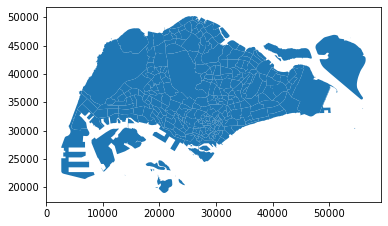

In [18]:
sz.plot()

The `geometry` column is special, as essentially it differentiate a geospatial table from a "normal" table (non-spatial table).

There are special functions to adjust the geometry. For example, if we wanted to represent each country using its *centroid*, a point in the middle of the shape, then we must take care to make sure that a new geometry column was set properly using the `set_geometry()` method.

In [19]:
sz['centroid'] = sz.geometry.centroid

We now have an additional feature:

In [20]:
sz.head()

,SUBZONE_N,SUBZONE_C,PLN_AREA_N,PLN_AREA_C,REGION_N,REGION_C,BET0TO2,BET3TO4,BET5TO6,BET7TO9,...,O,P,Q,R,S,T,U,V,geometry,centroid
0,PEOPLE'S PARK,OTSZ02,OUTRAM,OT,CENTRAL REGION,CR,0,0,0,0,...,0,6,5,0,11,0,0,0,"POLYGON ((29099.021 29640.030, 29116.963 29625...",POINT (28831.781 29419.646)
1,BUKIT MERAH,BMSZ02,BUKIT MERAH,BM,CENTRAL REGION,CR,10,10,20,40,...,51,22,34,0,10,0,0,0,"POLYGON ((26750.092 29216.098, 26751.912 29173...",POINT (26360.799 29384.143)
2,CHINATOWN,OTSZ03,OUTRAM,OT,CENTRAL REGION,CR,380,280,320,430,...,415,154,219,0,176,0,0,0,"POLYGON ((29161.201 29723.071, 29189.033 29704...",POINT (29153.968 29158.044)
3,PHILLIP,DTSZ04,DOWNTOWN CORE,DT,CENTRAL REGION,CR,0,0,0,0,...,0,0,0,0,0,0,0,0,"POLYGON ((29814.107 29616.894, 29806.682 29593...",POINT (29706.724 29744.908)
4,RAFFLES PLACE,DTSZ05,DOWNTOWN CORE,DT,CENTRAL REGION,CR,0,0,0,0,...,0,0,0,0,0,0,0,0,"POLYGON ((30137.768 29843.194, 30138.417 29841...",POINT (29968.618 29572.762)


Despite the fact that `centroid` is a geometry, it is not currently set as the geometry for our table. We can switch to the `centroid` column using the `set_geometry()` method. Finally, we can plot the centroid and the boundary of each country by switching the geometry column with `set_geometry`:

<AxesSubplot:>

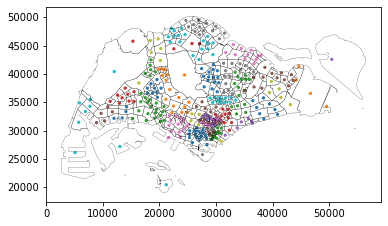

In [36]:
# Plot centroids
ax = sz.set_geometry('centroid')\
                .plot('PLN_AREA_N', 
                      markersize=5
                     )

# Plot polygons without color filling
sz.plot('PLN_AREA_N', 
                 ax=ax, 
                 facecolor='none', 
                 edgecolor='k', 
                 linewidth=.2
                )

Note how we can create a map by calling `.plot()` on a `GeoDataFrame`. We can thematically color each feature based on a column by passing the name of that column to the plot method (as we do on with `PLN_AREA_N` in this case).

Open Geospatial Consortium (OGC) has defined a set of "abstract" types that can be used to define any kind of geometry. The "simple features" specification defines the formal relationships between these types: 
* a `Point` is a zero-dimensional location with an x and y coordinate; 
* a `LineString` is a path composed of a set of more than one `Point`
* a `Polygon` is a surface that has at least one LineString that starts and stops with the same coordinate. 

All of these types *also* have `Multi` variants that indicate a collection of multiple geometries of the same type. 

In [37]:
sz.query('SUBZONE_N == "RAFFLES PLACE"')

,SUBZONE_N,SUBZONE_C,PLN_AREA_N,PLN_AREA_C,REGION_N,REGION_C,BET0TO2,BET3TO4,BET5TO6,BET7TO9,...,O,P,Q,R,S,T,U,V,geometry,centroid
4,RAFFLES PLACE,DTSZ05,DOWNTOWN CORE,DT,CENTRAL REGION,CR,0,0,0,0,...,0,0,0,0,0,0,0,0,"POLYGON ((30137.768 29843.194, 30138.417 29841...",POINT (29968.618 29572.762)


<AxesSubplot:>

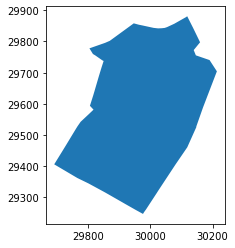

In [38]:
sz.query('SUBZONE_N == "RAFFLES PLACE"').plot()

<AxesSubplot:>

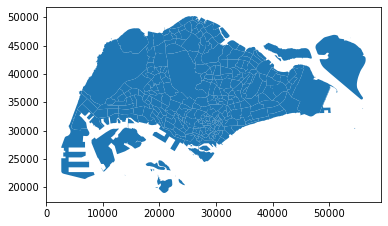

In [39]:
# plot the subzone polygons
sz.plot()

<AxesSubplot:>

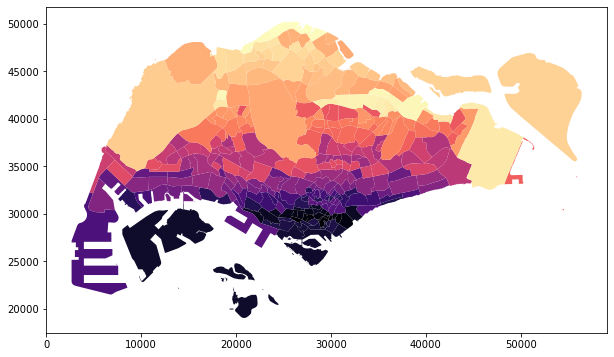

In [40]:
# some cmap codes 
# viridis, plasma, inferno, magma, cividis
# Greys, Purples, Blues, Greens, Oranges, Reds
# YlOrBr, OrRd, PuRd, RdPu, BuPu, GnBu, PuBu, YlGnBu, PuBuGn, BuGn, YlGn
# PiYg, PRGn, BrBG, PuOr, RdGy, RdBu, RdYlBu, Spectral, coolwarm, bwr, seismic
# twilight, twilight_shifted, hsv
# Pastel1, Pastel2, PAired, Accent, Dark2, Set1, Set2, Set3, tab10, tab20, tab20b, tab20c
sz.plot(cmap='magma', figsize=(12, 6))
# We can also plot the  polygons with no fill color by using GeoDataFrame.boundary.plot()
# sz.boundary.plot()

<AxesSubplot:>

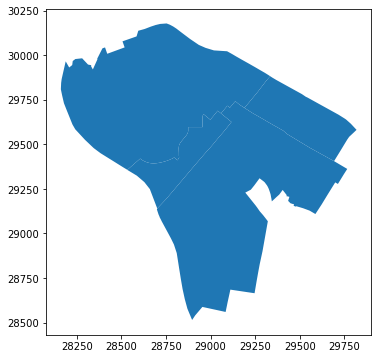

In [42]:
# we can choose one subzone to plot
sz.query('PLN_AREA_N == "OUTRAM"').plot(figsize=(12, 6))

<AxesSubplot:>

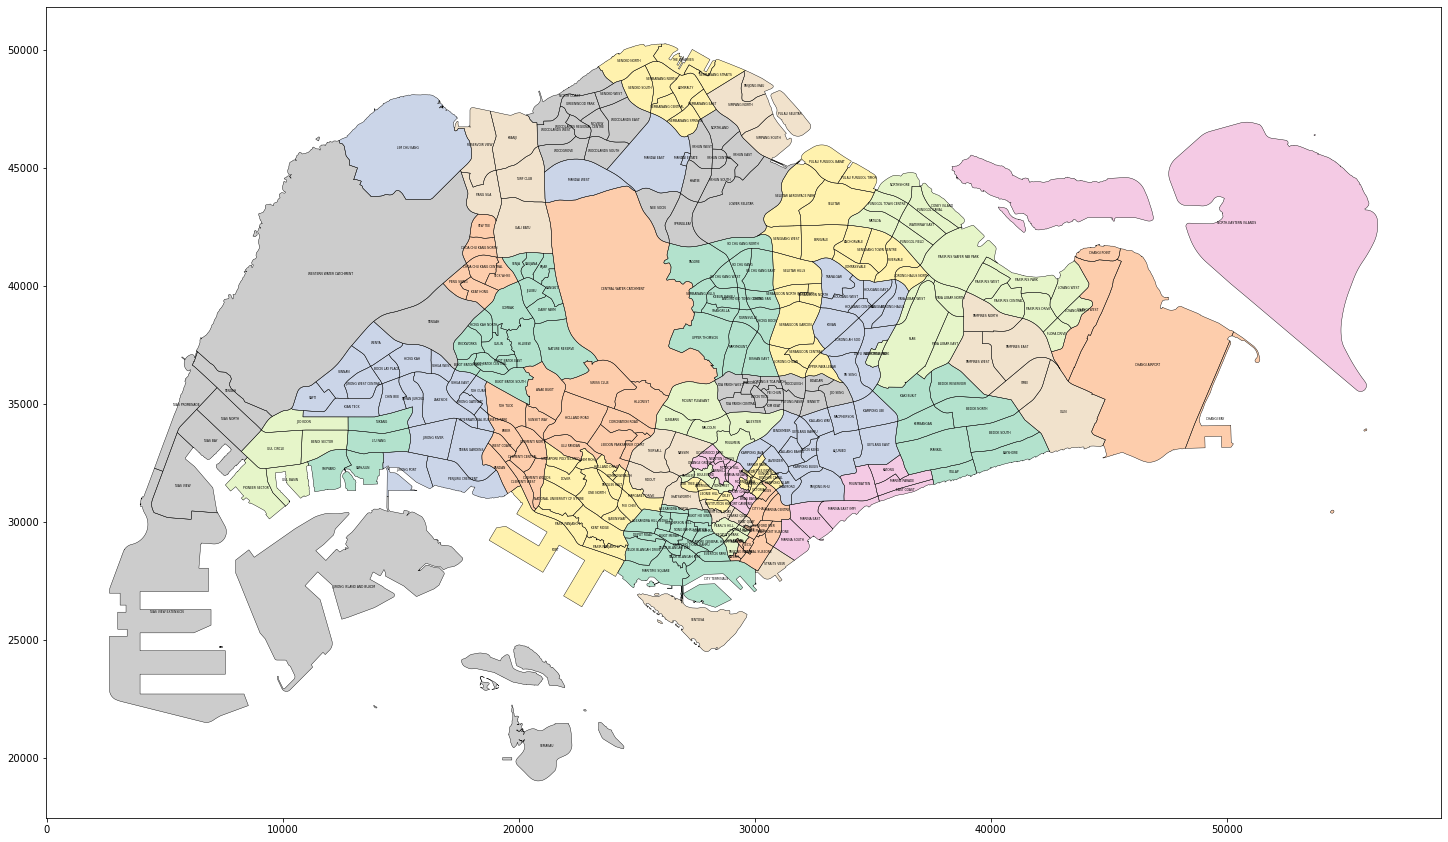

In [47]:
# add label
fig = plt.figure(1, figsize=(25,15)) 
ax = fig.add_subplot()
sz.apply(lambda x: ax.annotate(text=x.SUBZONE_N, xy=x.geometry.centroid.coords[0], ha='center', fontsize=3),axis=1);
sz.boundary.plot(ax=ax, figsize=(25, 14), color='Black', linewidth=.4)
sz.plot('PLN_AREA_N',ax=ax, cmap='Pastel2')

### Convert CSV into GeoDataFrame tables 

In [79]:
schools_latlong = pd.read_csv("Data/CentralRegion_schools_latlong.csv")

In [80]:
schools_geoms = geopandas.points_from_xy(x=schools_latlong["longitude"],
                                    y=schools_latlong["latitude"],
                                    crs="epsg:4326"
                                   )

In [81]:
schools = geopandas.GeoDataFrame(schools_latlong,
                                   geometry=schools_geoms
                                  )

In [82]:
# ensure that the two layers have the same crs
# here we have to transform the crs instead of set a new
central_schools_sf=schools.to_crs("epsg:3414")

And now `geometry` column stores `POINT` geometries:

In [83]:
central_schools_sf.head()

,BUILDING_N,longitude,latitude,geometry
0,ACS OLDHAM HALL - THE BOARDING SCHOOL,103.834958,1.319923,POINT (28182.451 33575.896)
1,AI TONG SCHOOL,103.833020,1.360583,POINT (27966.772 38071.871)
2,ALEXANDRA PRIMARY SCHOOL,103.824425,1.291334,POINT (27010.221 30414.674)
3,ANGLO-CHINESE SCHOOL (BARKER ROAD),103.835941,1.319662,POINT (28291.850 33547.036)
4,ANGLO-CHINESE SCHOOL (INDEPENDENT) BOARDING SC...,103.781310,1.301061,POINT (22211.913 31490.293)


<AxesSubplot:>

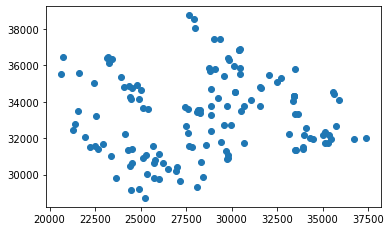

In [84]:
central_schools_sf.plot()

### Visualize Two Layers (geopandas tables)

<AxesSubplot:>

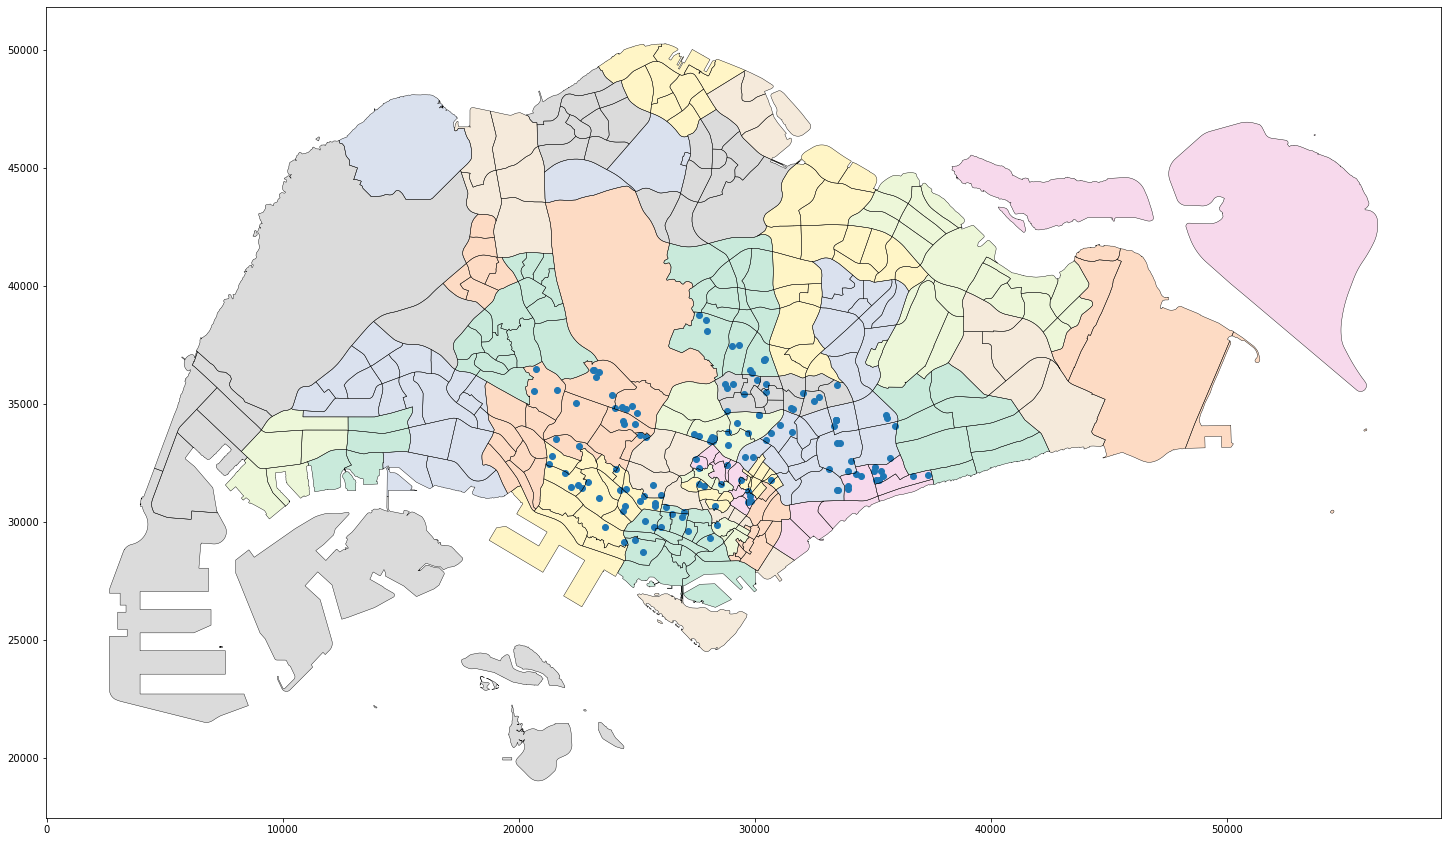

In [87]:
fig = plt.figure(1, figsize=(25,15)) 
ax = fig.add_subplot()
sz.boundary.plot(ax=ax, figsize=(25, 14), color='Black', linewidth=.4)
sz.plot('PLN_AREA_N',ax=ax, cmap='Pastel2',alpha=0.7)
central_schools_sf.plot(ax=ax)

### Choropleth map

Choropleth maps are useufl as they display non-geographic attributes on a geographic map. Choropleth maps represent data at the region level, and are appropriate for areal unit data where each observation combines a value of an attribute and a geometric figure.

In [105]:
%matplotlib inline

import seaborn
import pandas
import geopandas
import pysal
import numpy
import mapclassify
import matplotlib.pyplot as plt

C:\Users\user\.conda\envs\qgis-vanguard\lib\site-packages\pysal\explore\segregation\network\network.py:15: UserWarning: You need pandana and urbanaccess to work with segregation's network module
You can install them with  `pip install urbanaccess pandana` or `conda install -c udst pandana urbanaccess`
  warn(
C:\Users\user\.conda\envs\qgis-vanguard\lib\site-packages\pysal\model\spvcm\abstracts.py:10: UserWarning: The `dill` module is required to use the sqlite backend fully.
  from .sqlite import head_to_sql, start_sql


#### Quantitative data classification 

The first step of making a choropleth map is to choose attribute values (a column of geographic table) and classify it into mutually exclusive and exhaustive groups. 

Different classification schemes obtain from their definition of the class
boundaries. The choice of the classification scheme should take into
consideration the statistical distribution of the attribute values. 

In [88]:
sz.describe()

,BET0TO2,BET3TO4,BET5TO6,BET7TO9,BET10TO12,BET13TO14,BET15TO16,BET17TO19,BET20TO24,BET25TO29,...,M,N,O,P,Q,R,S,T,U,V
count,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000,...,321.000000,321.000000,321.000000,321.00000,321.000000,321.000000,321.000000,321.0,321.0,321.0
mean,358.535826,247.694704,262.585670,393.520249,404.361371,273.738318,293.676012,455.420561,817.258567,922.429907,...,501.654206,564.386293,425.087227,193.34891,320.722741,20.816199,205.545171,0.0,0.0,0.0
std,596.196832,409.137408,415.178252,593.563713,601.736274,414.009790,452.494690,715.175171,1328.048601,1413.394744,...,690.579346,886.054732,657.296564,271.24519,488.292280,35.175105,306.756131,0.0,0.0,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.0
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.0
50%,120.000000,90.000000,90.000000,150.000000,160.000000,110.000000,110.000000,170.000000,280.000000,330.000000,...,204.000000,115.000000,122.000000,89.00000,90.000000,0.000000,44.000000,0.0,0.0,0.0
75%,470.000000,310.000000,330.000000,540.000000,550.000000,370.000000,400.000000,600.000000,1100.000000,1330.000000,...,775.000000,860.000000,638.000000,311.00000,451.000000,31.000000,284.000000,0.0,0.0,0.0
max,3590.000000,2360.000000,2470.000000,3830.000000,3830.000000,2800.000000,3180.000000,5210.000000,11050.000000,11620.000000,...,4966.000000,7015.000000,5104.000000,1814.00000,3924.000000,248.000000,2155.000000,0.0,0.0,0.0


In [89]:
sz.columns

Index(['SUBZONE_N', 'SUBZONE_C', 'PLN_AREA_N', 'PLN_AREA_C', 'REGION_N',
       'REGION_C', 'BET0TO2', 'BET3TO4', 'BET5TO6', 'BET7TO9',
       ...
       'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'geometry', 'centroid'],
      dtype='object', length=115)

In [97]:
attr.columns

Index(['Attribute', 'Definition'], dtype='object')

In [99]:
attr.query("Attribute=='O' or Attribute=='P'")

,Attribute,Definition
100,O,CPF member industry: Public Admin & Defence
101,P,CPF member industry: Education


Another way of doing this:

In [101]:
# first define a list
ls = ['O', 'P']
attr.query("Attribute ==@ls") # which is slightly faster than attr.query("Attribute in @ls")

,Attribute,Definition
100,O,CPF member industry: Public Admin & Defence
101,P,CPF member industry: Education


In [102]:
attr.query("Attribute in @ls")

,Attribute,Definition
100,O,CPF member industry: Public Admin & Defence
101,P,CPF member industry: Education


In [103]:
sz[['SUBZONE_N', 'BET0TO2','O', 'P']].head()

,SUBZONE_N,BET0TO2,O,P
0,PEOPLE'S PARK,0,0,6
1,BUKIT MERAH,10,51,22
2,CHINATOWN,380,415,154
3,PHILLIP,0,0,0
4,RAFFLES PLACE,0,0,0


Displays the following statistical distribution:

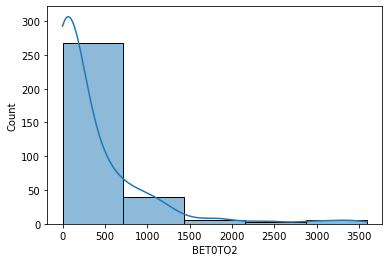

In [119]:
h = seaborn.histplot(sz['BET0TO2'], bins=5, kde=True)

As we can see, the distribution is positively skewed as in common in regional income studies. In other words,
the mean exceeds the median (`50%`, in the table below), leading the to fat right tail in the figure. As
we shall see, this skewness will have implications for the choice of choropleth
classification scheme.

In [122]:
counts, bins, patches = h.hist(sz['BET0TO2'], bins=5)

In [123]:
counts

array([267.,  39.,   6.,   3.,   6.])

The `bin` object stores these break points we are interested in when considering classification schemes (the `patches` object can be ignored in this context, as it stores the geometries of the histogram plot):

In [124]:
bins

array([   0.,  718., 1436., 2154., 2872., 3590.])

In [125]:
3590/5

718.0

This yields 5 bins, with the first having a lower bound of 0 and an upper
bound of 718 which contains 267 observations. 
The determination of the
interval width ($w$) and the number of bins in `seaborn` is based on the Freedman-Diaconis rule:

$$
w = 2 * IQR * n^{-1/3}
$$

where $IQR$ is the inter quartile
range of the attribute values. Given $w$ the number of bins ($k$) is:

$$k=(max-
min)/w.$$

Below we present several approaches to create these break points that follow criteria that can be of interest in different contexts, as they focus on different priorities.
 

##### Equal Intervals
In equal intervals", each of the bins has the same width in the value space. Equal intervals are simple to use and ease to
interpret. However, in some cases, equal intervals can result in one or more classes being sparse. This is clearly the case in our dataset.

In [112]:
sz['BET0TO2'].describe()

count     321.000000
mean      358.535826
std       596.196832
min         0.000000
25%         0.000000
50%       120.000000
75%       470.000000
max      3590.000000
Name: BET0TO2, dtype: float64

In [115]:
ei5 = mapclassify.EqualInterval(sz['BET0TO2'], k=5)
ei5

EqualInterval             

     Interval        Count
--------------------------
[   0.00,  718.00] |   267
( 718.00, 1436.00] |    39
(1436.00, 2154.00] |     6
(2154.00, 2872.00] |     3
(2872.00, 3590.00] |     6

This value of $k=5$ also coincides with the default classification
in the `seaborn` histogram. It should also be noted that the first class is closed on the lower bound.

##### Quantiles
Each class will have approximately $\mid\frac{n}{k}\mid$ observations using the quantile
classifier. If $k=5$ the sample quintiles are used to define the upper limits of
each class resulting in the following classification:

In [127]:
q5 = mapclassify.Quantiles(sz.BET0TO2, k=5) # sz.BET0TO2 equals sz['BET0TO2'] 
q5

Quantiles                 

     Interval        Count
--------------------------
[   0.00,    0.00] |   106
(   0.00,   30.00] |    23
(  30.00,  230.00] |    64
( 230.00,  600.00] |    64
( 600.00, 3590.00] |    64

Note that while the numbers of values in each class are roughly equal, the
widths of the first four intervals are rather different:

In [128]:
q5.bins[1:]-q5.bins[:-1]

array([  30.,  200.,  370., 2990.])

While quantiles does avoid the pitfall of sparse classes, this classification is
not problem free. The varying widths of the intervals can be markedly different
which can lead to problems of interpretation. A second challenge facing quantiles
arises when there are a large number of duplicate values in the distribution
such that the limits for one or more classes become ambiguous. For example, if one had a variable with $n=20$ but 10 of the observations took on the same value which was the minimum observed, then for values of $k>2$, the class boundaries become ill-defined since a simple rule of splitting at the $n/k$ ranked observed value would depend upon how ties are treated when ranking.

In [12]:
numpy.random.seed(12345)
x = numpy.random.randint(0,10,20)
x[0:10] = x.min()
x

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 9, 7, 6, 0, 2, 9, 1, 2, 6, 7])

In [13]:
ties = mapclassify.Quantiles(x, k=5)
ties

Quantiles           

  Interval     Count
--------------------
[0.00, 0.00] |    11
(0.00, 1.40] |     1
(1.40, 6.20] |     4
(6.20, 9.00] |     4

In [14]:
x

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 9, 7, 6, 0, 2, 9, 1, 2, 6, 7])

##### Mean-standard deviation

Our third classifier uses the sample mean $\bar{x} =
\frac{1}{n} \sum_{i=1}^n x_i$ and sample standard deviation $s = \sqrt{
\frac{1}{n-1} \sum_{i=1}^n (x_i - \bar{x})  }$ to define class boundaries as
some distance from the sample mean, with the distance being a multiple of the
standard deviation. For example, a common definition for $k=5$ is to set the
upper limit of the first class to two standard deviations ($c_{0}^u = \bar{x} - 2 s$), and the intermediate
classes to have upper limits within one standard deviation ($c_{1}^u = \bar{x}-s,\ c_{2}^u = \bar{x}+s, \ c_{3}^u
= \bar{x}+2s$). Any values greater (smaller) than two standard deviations above (below) the mean
are placed into the top (bottom) class.

In [131]:
msd = mapclassify.StdMean(sz.BET0TO2)
msd

StdMean                   

     Interval        Count
--------------------------
(   -inf, -833.86] |     0
(-833.86, -237.66] |     0
(-237.66,  954.73] |   283
( 954.73, 1550.93] |    24
(1550.93, 3590.00] |    14

This classifier is best used when data is normally distributed and when the sample mean is meaningful. This is
not the case for our population age data. 

##### Maximum Breaks

The maximum breaks classifier decides where to set the break points between
classes by considering the difference between sorted values. Rather
than considering a value of the dataset in itself, it looks at how apart each
value is from the next one in the sorted sequence. 

In [132]:
mb5 = mapclassify.MaximumBreaks(sz.BET0TO2, k=5)
mb5

MaximumBreaks             

     Interval        Count
--------------------------
[   0.00, 1605.00] |   307
(1605.00, 2065.00] |     5
(2065.00, 2730.00] |     3
(2730.00, 3085.00] |     2
(3085.00, 3590.00] |     4

Maximum breaks is an appropriate approach when we are interested in making sure
observations in each class are separated from those in neighboring classes. As
such, it works well in cases where the distribution of values is not unimodal.

Some other methdos of claasification include Box-Plot,Head-Tail Breaks,Jenks Caspall,Fisher Jenks, Max-p, please refer to [Python Data Science Handbook](https://github.com/jakevdp/PythonDataScienceHandbook)  


#### Color

The second step of making a choropleth map is to select the symbolization and color scheme. 

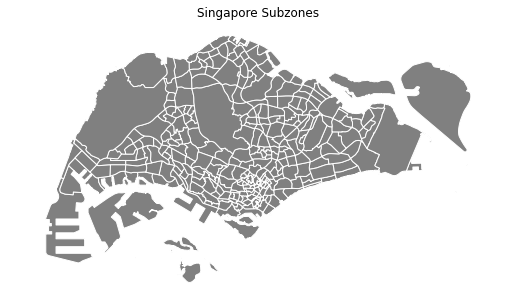

In [134]:
f, ax = plt.subplots(1, figsize=(9, 5))
sz.plot(ax=ax, color='grey', edgecolor='white')
ax.set_axis_off()
ax.set_title('Singapore Subzones')
plt.axis('equal')
plt.show()

Note that the spatial units for these subzone are not homogeneous in their shapes. The spatial distribution is complicated to evaluate from a visual perspective, as our our attention tends to be drawn to the larger polygons. 

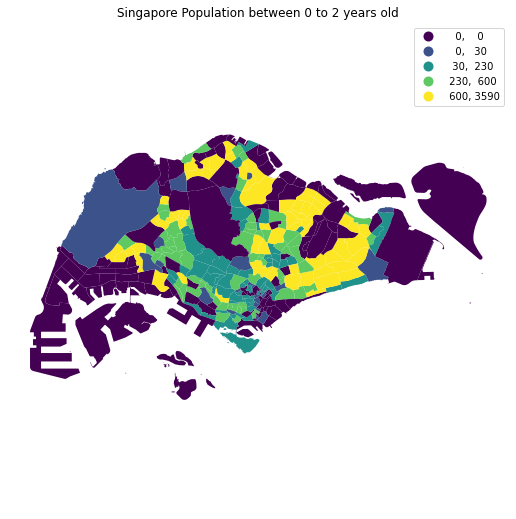

In [136]:
f, ax = plt.subplots(1, figsize=(9, 9))
sz.plot(ax=ax, column='BET0TO2', legend=True, scheme='Quantiles',legend_kwds={'fmt':'{:.0f}'})
ax.set_axis_off()
ax.set_title('Singapore Population Between 0 to 2 years Old')
plt.axis('equal')
plt.show()

The default color map used by `geopandas` is viridis, which is a multi-hue
sequential scheme, with the darker (lighter) hues representing lower (higher)
values for the attribute in question. The choice of a color scheme for a
choropleth map should be based on the type of variable under consideration
{cite}`Brewer1997mapping`. Generally, a distinction is drawn between three
types of numerical attributes:

- sequential
- diverging
- qualitative

##### Sequential Color Schemes

Population size is a *sequential* attribute. To choose an appropriate sequential scheme we can override the `cmap` parameter:

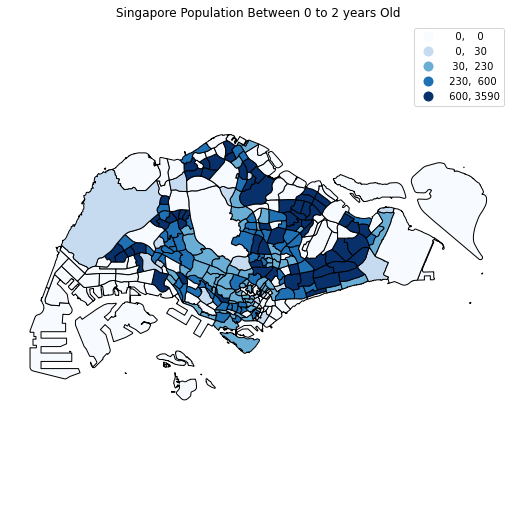

In [145]:
f, ax = plt.subplots(1, figsize=(9, 9))
sz.plot(ax=ax, column='BET0TO2', legend=True, scheme='Quantiles', legend_kwds={'fmt':'{:.0f}'}, cmap='Blues', edgecolor="k")
ax.set_axis_off()
ax.set_title('Singapore Population Between 0 to 2 years Old')
plt.axis('equal')
plt.show()

##### Diverging Color Schemes

Diverging color schemes are useful when we want to place equal emphasis on mid-range critical values as
well as extremes at both ends of the distribution (e.g., meansures the change in a subzone's income). Light colors are used to
emphasize the mid-range class while dark colors with contrasting hues are used
to distinguish the low and high extremes.

We do not have such kind of data in the original data but we can mock up some data to illustrate it. 

In [160]:
sz.columns

Index(['SUBZONE_N', 'SUBZONE_C', 'PLN_AREA_N', 'PLN_AREA_C', 'REGION_N',
       'REGION_C', 'BET0TO2', 'BET3TO4', 'BET5TO6', 'BET7TO9',
       ...
       'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'geometry', 'centroid'],
      dtype='object', length=115)

In [149]:
sz.rank(ascending=False)

,BET0TO2,BET3TO4,BET5TO6,BET7TO9,BET10TO12,BET13TO14,BET15TO16,BET17TO19,BET20TO24,BET25TO29,...,M,N,O,P,Q,R,S,T,U,V
0,268.5,266.0,268.0,270.5,269.5,266.0,266.0,213.5,219.5,208.5,...,210.0,205.0,264.0,206.5,211.5,240.0,191.5,161.0,161.0,161.0
1,208.0,203.0,195.5,191.5,192.0,189.5,190.5,195.5,189.5,196.5,...,196.5,182.0,179.0,186.0,182.0,240.0,193.5,161.0,161.0,161.0
2,90.0,88.0,83.0,97.5,127.5,146.5,158.0,150.5,143.5,128.0,...,103.0,122.0,100.0,122.0,130.0,240.0,120.5,161.0,161.0,161.0
3,268.5,266.0,268.0,270.5,269.5,266.0,266.0,270.5,273.0,274.0,...,268.0,267.0,264.0,266.0,267.0,240.0,263.0,161.0,161.0,161.0
4,268.5,266.0,268.0,270.5,269.5,266.0,266.0,270.5,273.0,274.0,...,268.0,267.0,264.0,266.0,267.0,240.0,263.0,161.0,161.0,161.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316,2.0,1.0,4.0,10.0,19.0,27.5,35.5,50.0,67.5,46.0,...,17.0,29.0,7.0,19.0,19.0,14.0,27.0,161.0,161.0,161.0
317,107.5,113.5,118.5,122.5,110.0,112.0,93.5,88.5,83.0,90.0,...,148.5,80.0,118.5,129.0,105.0,46.0,85.0,161.0,161.0,161.0
318,178.0,185.5,182.0,180.5,186.5,179.0,185.0,180.0,179.0,181.0,...,188.5,186.0,172.0,184.0,185.0,240.0,166.0,161.0,161.0,161.0
319,268.5,266.0,268.0,270.5,269.5,266.0,266.0,270.5,273.0,274.0,...,268.0,267.0,264.0,266.0,267.0,240.0,263.0,161.0,161.0,161.0


In [161]:
rnk = sz.rank(ascending=False) # ascending ranks 1=high, n=lowest
rnk['SUBZONE_N']=sz['SUBZONE_N']
delta_rnk = rnk.BET3TO4 - rnk.BET0TO2
delta_rnk

0     -2.5
1     -5.0
2     -2.0
3     -2.5
4     -2.5
      ... 
316   -1.0
317    6.0
318    7.5
319   -2.5
320   -2.5
Length: 321, dtype: float64

In [148]:
cls = numpy.digitize(delta_rnk, [-5, 0, 5, 20])
cls

array([1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 0, 0, 2, 2, 4, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 2, 3, 1, 3, 0, 1, 0, 3, 1, 3, 3, 1, 2,
       1, 1, 2, 1, 2, 0, 1, 1, 1, 4, 1, 1, 1, 1, 4, 0, 1, 1, 4, 1, 1, 1,
       1, 0, 3, 1, 1, 1, 2, 1, 1, 0, 3, 1, 3, 1, 3, 4, 1, 1, 1, 1, 1, 3,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 3, 0, 3, 3, 1, 1, 1, 1, 2, 2,
       1, 1, 0, 0, 3, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 3, 0,
       1, 3, 1, 1, 0, 0, 2, 2, 0, 3, 1, 1, 2, 3, 1, 2, 1, 4, 4, 1, 4, 0,
       0, 3, 2, 3, 3, 1, 1, 3, 0, 2, 3, 2, 2, 4, 3, 1, 0, 4, 1, 1, 2, 0,
       1, 1, 1, 3, 1, 2, 4, 1, 2, 3, 1, 2, 0, 4, 0, 0, 2, 0, 1, 1, 3, 1,
       1, 1, 4, 0, 3, 0, 1, 1, 1, 1, 3, 3, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2,
       3, 3, 3, 1, 1, 1, 2, 1, 3, 1, 1, 2, 2, 3, 1, 1, 3, 1, 3, 3, 2, 2,
       1, 1, 1, 1, 1, 1, 0, 0, 4, 1, 3, 2, 0, 2, 1, 2, 2, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 3, 1, 1, 3, 3, 1, 1, 4, 1, 0, 1, 0, 2, 0,
       1, 2, 1, 1, 1, 1, 1, 3, 3, 2, 1, 1, 1, 0, 1,

Here we have created four classes for the rank changes: [-inf, -5), [-5, 0), [0,
5), [5, 20].

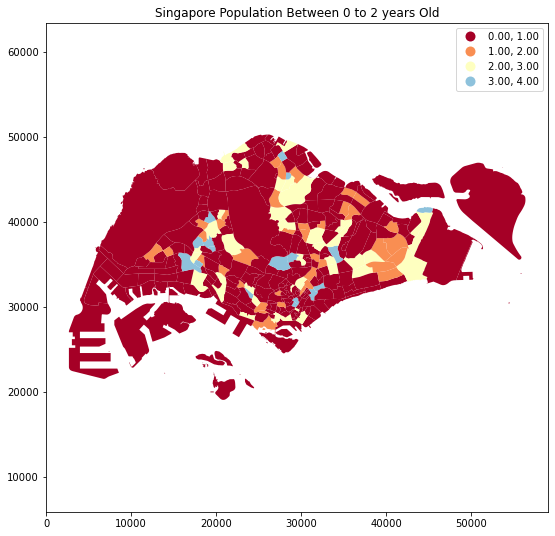

In [151]:
f, ax = plt.subplots(1, figsize=(9, 9))
sz.assign(cl=cls).plot(ax=ax, column='cl', categorical=True, cmap='RdYlBu',
           scheme='equal_interval', k=4,legend=True)
ax.set_axis_off
ax.set_title('Singapore Population Change Between 0 to 2 years Old')
plt.axis('equal')
plt.show()

Here the red (blue) hues are states that have moved downwards (upwards) in the
income distribution, with the darker hue representing a larger movement.

##### Qualitative Color Schemes

Qualitative color schemes are used for nominal measurement scales.

In [152]:
sz['SUBZONE_N'].head()

0    PEOPLE'S PARK
1      BUKIT MERAH
2        CHINATOWN
3          PHILLIP
4    RAFFLES PLACE
Name: SUBZONE_N, dtype: object

<AxesSubplot:>

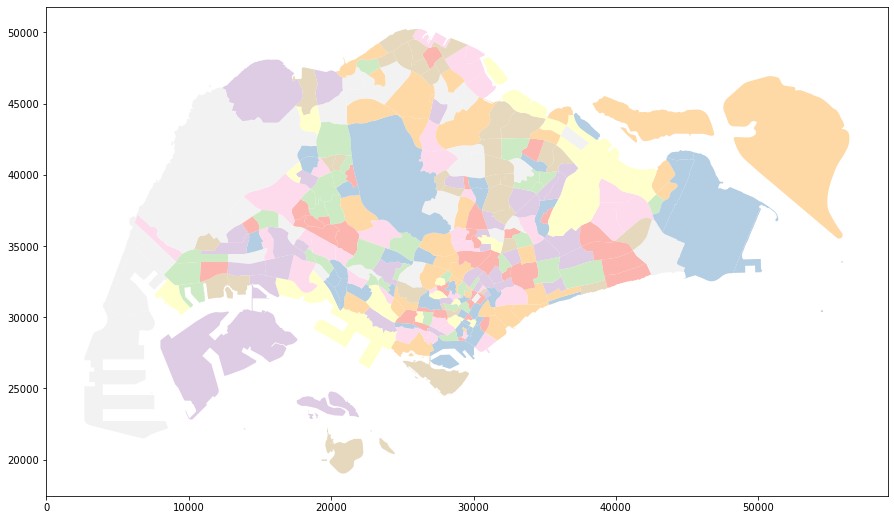

In [159]:
sz.plot("SUBZONE_N", cmap='Pastel1',figsize=(25,9))

# References

[Python Data Science Handbook](https://github.com/jakevdp/PythonDataScienceHandbook)